<a href="https://colab.research.google.com/github/mynoong/machine-learning-basics/blob/main/handwrittenNumberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
"""
FNN without Spatial Image Filtering
"""

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784) # make MNIST image elements into 1-D vector
x_train = x_train.astype('float32')
x_train = x_train / 255 # normalize values into 0 ~ 1
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
# transform 0 ~ 9 int values into 1-of-K incoded vector

# the same procedure is repeated for test data
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)


In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
# uses flattened input of 784-element 1-D array instead of 28*28 2-D image
model.add(Dense(16, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = Adam(), metrics = ['accuracy']) # Adam: Adaptive moment estimation

In [ ]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 1000,
                    verbose = 0, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Test loss: 0.5073353052139282
Test accuracy: 0.8959000110626221
Computation time:11.955 sec


313/313 [==============================] - 0s 1ms/step


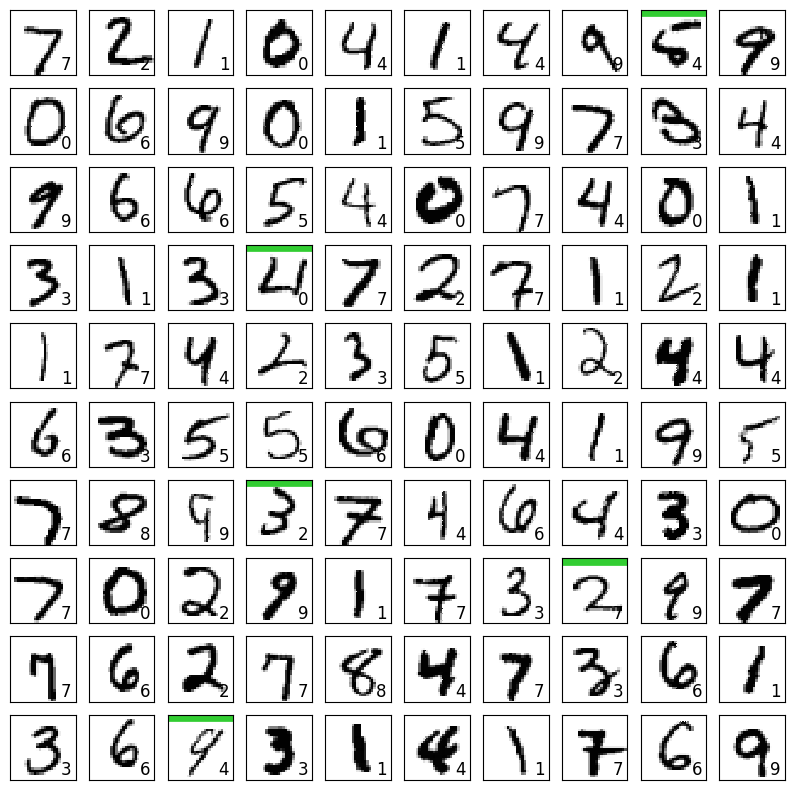

In [ ]:
n_show = 100 # takes first 100 output into account
y = model.predict(x_test)
plt.figure(2, figsize=(10, 10))
plt.gray()
for i in range(n_show):
    plt.subplot(10, 10, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    val = y[i, :]
    prediction = np.argmax(val)
    plt.text(21, 25, "%d" % prediction, fontsize = 12)
    if prediction != np.argmax(y_test[i, :]):
        plt.plot([0, 27], [1, 1], color = 'limegreen', linewidth = 7)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
import numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
"""
CNN with Spatial Image Filtering + ReLU
"""

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

# make MNIST image elements into 28*28 2-D vector
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255 # normalize values into 0 ~ 1
num_classes = 10
# transform 0 ~ 9 int values into 1-of-K incoded vector
y_train = np_utils.to_categorical(y_train, num_classes)


# the same procedure is repeated for test data
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [37]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.optimizers import Adam

model = Sequential()
# use ReLU as activation function and
# put paddings to keep an image size the same
model.add(Conv2D(8, (3, 3), padding = 'same',
                 input_shape = (28, 28, 1), activation = 'relu'))
# after employing convolution, make it to 1-D vector
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(),
              metrics = ['accuracy'])


In [39]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, batch_size = 1000, epochs = 10,
                    verbose = 1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 13s 212ms/step - loss: 0.0494 - accuracy: 0.9866 - val_loss: 0.0647 - val_accuracy: 0.9800
Epoch 2/10
60/60 [==============================] - 15s 257ms/step - loss: 0.0476 - accuracy: 0.9866 - val_loss: 0.0647 - val_accuracy: 0.9803
Epoch 3/10
60/60 [==============================] - 13s 212ms/step - loss: 0.0468 - accuracy: 0.9869 - val_loss: 0.0664 - val_accuracy: 0.9787
Epoch 4/10
60/60 [==============================] - 13s 214ms/step - loss: 0.0446 - accuracy: 0.9880 - val_loss: 0.0665 - val_accuracy: 0.9795
Epoch 5/10
60/60 [==============================] - 13s 216ms/step - loss: 0.0427 - accuracy: 0.9883 - val_loss: 0.0656 - val_accuracy: 0.9794
Epoch 6/10
60/60 [==============================] - 13s 217ms/step - loss: 0.0415 - accuracy: 0.9882 - val_loss: 0.0655 - val_accuracy: 0.9796
Epoch 7/10
60/60 [==============================] - 13s 221ms/step - loss: 0.0400 - accuracy: 0.9890 - val_loss: 0.0654 - val_accuracy: 0.9788

313/313 [==============================] - 2s 5ms/step


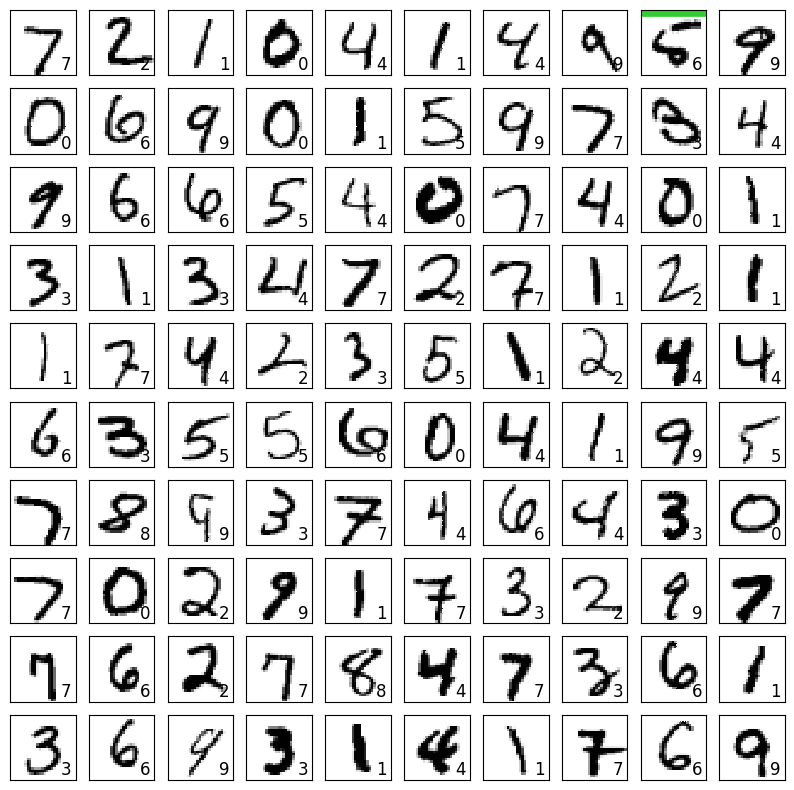

In [40]:
n_show = 100 # takes first 100 output into account
y = model.predict(x_test)
plt.figure(2, figsize=(10, 10))
plt.gray()
for i in range(n_show):
    plt.subplot(10, 10, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    val = y[i, :]
    prediction = np.argmax(val)
    plt.text(21, 25, "%d" % prediction, fontsize = 12)
    if prediction != np.argmax(y_test[i, :]):
        plt.plot([0, 27], [1, 1], color = 'limegreen', linewidth = 7)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()

In [41]:
"""
Final CNN Proposal w/ Pooling & Dropout
"""
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # max pool and reduce resoluation
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # max pool and reduce resoluation
model.add(Dropout(0.5)) # dropout prevents overfitting
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = Adam(),
              metrics = ['accuracy'])

In [42]:
import time
startTime = time.time()

history = model.fit(x_train, y_train, batch_size = 1000, epochs = 10,
                    verbose = 0, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Test loss: 0.02615169994533062
Test accuracy: 0.9909999966621399
Computation time:926.508 sec


313/313 [==============================] - 7s 21ms/step


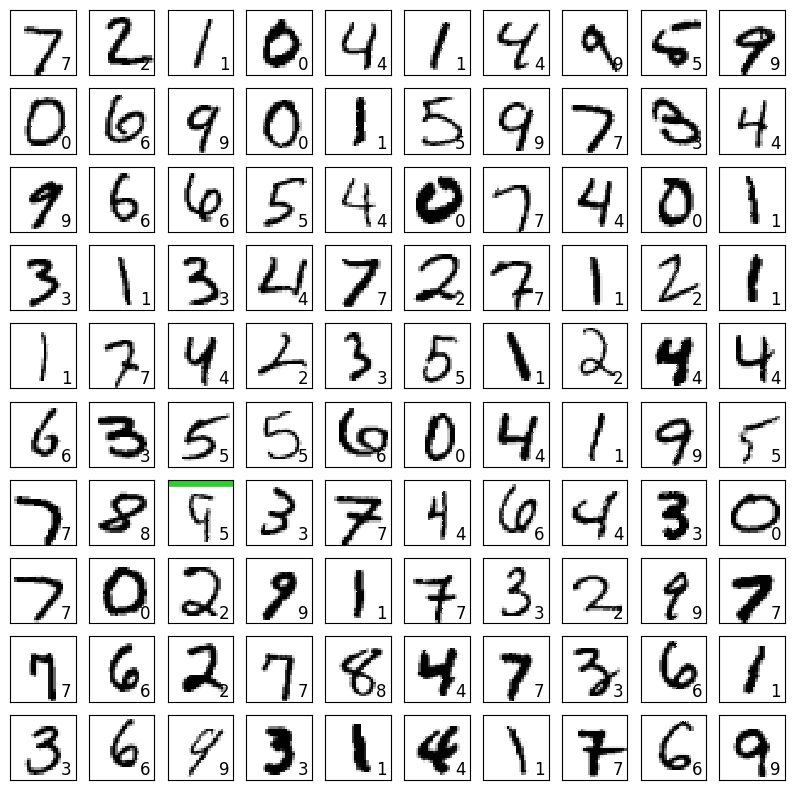

In [43]:
n_show = 100 # takes first 100 output into account
y = model.predict(x_test)
plt.figure(2, figsize=(10, 10))
plt.gray()
for i in range(n_show):
    plt.subplot(10, 10, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    val = y[i, :]
    prediction = np.argmax(val)
    plt.text(21, 25, "%d" % prediction, fontsize = 12)
    if prediction != np.argmax(y_test[i, :]):
        plt.plot([0, 27], [1, 1], color = 'limegreen', linewidth = 7)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()